# Car Features and MSRP Dataet

- `Number of Instances`: **11914**
- `Number of Attributes`: **16**
- `Attributes`(Description of Attributes, according to me which I got from dicussions and Google beacuse it was not given in the https://www.kaggle.com/CooperUnion/cardataset page): 
  - `Make`: Make of a car(BMW, Volkswagen and so on)
  - `Model`: Model of a car
  - `Year`: Year when the car was manufactured
  - `Engine Fuel Type`: Type of fuel engine needs(disel and so on)
  - `Engine HP`: Horsepower of engine
  - `Engine Cylinders`: Number of cylinders in engine
  - `Transmission Type`: Type of transmission(automatic or manual)
  - `Driven Wheels`: front, rear, all
  - `Number of Doors`: Number of doors a car has
  - `Market Category`: luxury, crossover and so on
  - `Vehicle Size`: compact, midsize, large
  - `Vehicle Style`: Style of vehicle(sedan, convertible and so on)
  - `Highway MPG`: miles per gallon(MPG) in highway
  - `City MPG`: miles per gallon(MPG) in city
  - `Popularity`: Number of times the car was mentioned in a Twitter stream
  - `MSRP`: Manufacturer's Suggested Retail Price

# 1. Understand the Business Requirements

**Problem statement:**

`Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.`

# 2. Collecting Data

`which was given in .csv file from Kaggle website(link was attached above).`

In [1]:
#Python Libraries 
import pandas as pd #Data Processing and CSV file I/o
import numpy as np #for numeric operations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#to make sure that plots rendered correctly in jupyter notebook


from sklearn.model_selection import train_test_split #split train and test dataset

In [2]:
car_df = pd.read_csv('archive.zip') #reading the .csv file which is present in archive.zip file 

In [3]:
car_df.head(8) #top 8 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300


In [4]:
#lowercasing all the column names and replacing space with underscores
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')

In [5]:
car_df.columns #columns name

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
car_df.dtypes #data type of every column

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
#similary lowercasing all the rows and replacing space with underscores
string_columns = list(car_df.dtypes[car_df.dtypes == 'object'].index)
for col in string_columns:
    car_df[col] = car_df[col].str.lower().str.replace(' ', '_')

In [8]:
car_df.sample(4)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8190,dodge,ram_pickup_1500,2010,regular_unleaded,215.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,20,14,1851,20610
9618,chevrolet,silverado_1500,2017,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,22,16,1385,41590
10541,volkswagen,touareg,2016,premium_unleaded_(recommended),280.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,23,17,873,46745
8312,land_rover,range_rover,2015,flex-fuel_(premium_unleaded_required/e85),510.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,high-performance",large,4dr_suv,19,13,258,118845


In [9]:
print(f"The Numbers of Rows and Columns in this data set are: {car_df.shape[0]} rows and {car_df.shape[1]} columns.")

The Numbers of Rows and Columns in this data set are: 11914 rows and 16 columns.


# 3. Exploratory Data Analysis(EDA)

In [10]:
#Checking for Data type of columns
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
car_df.sample(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8012,volkswagen,rabbit,2009,regular_unleaded,170.0,5.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,20,873,19340
3626,dodge,durango,2016,regular_unleaded,295.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,performance",large,4dr_suv,27,19,1851,41295


- `Everything looks fine for Data type of columns`.

In [12]:
#summary statistics for categorical columns
car_df.describe(include=['object'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


In [13]:
car_df['age'] = 2017 - car_df['year']
car_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,age
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,6
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,6
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,6
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,6
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,6


In [14]:
car_df.drop(['year'], axis=1, inplace=True)#droping the year

In [15]:
car_df.head()

,make,model,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,age
0,bmw,1_series_m,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,6
1,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,6
2,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,6
3,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,6
4,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,6


## Checking out the Correlation Matrix

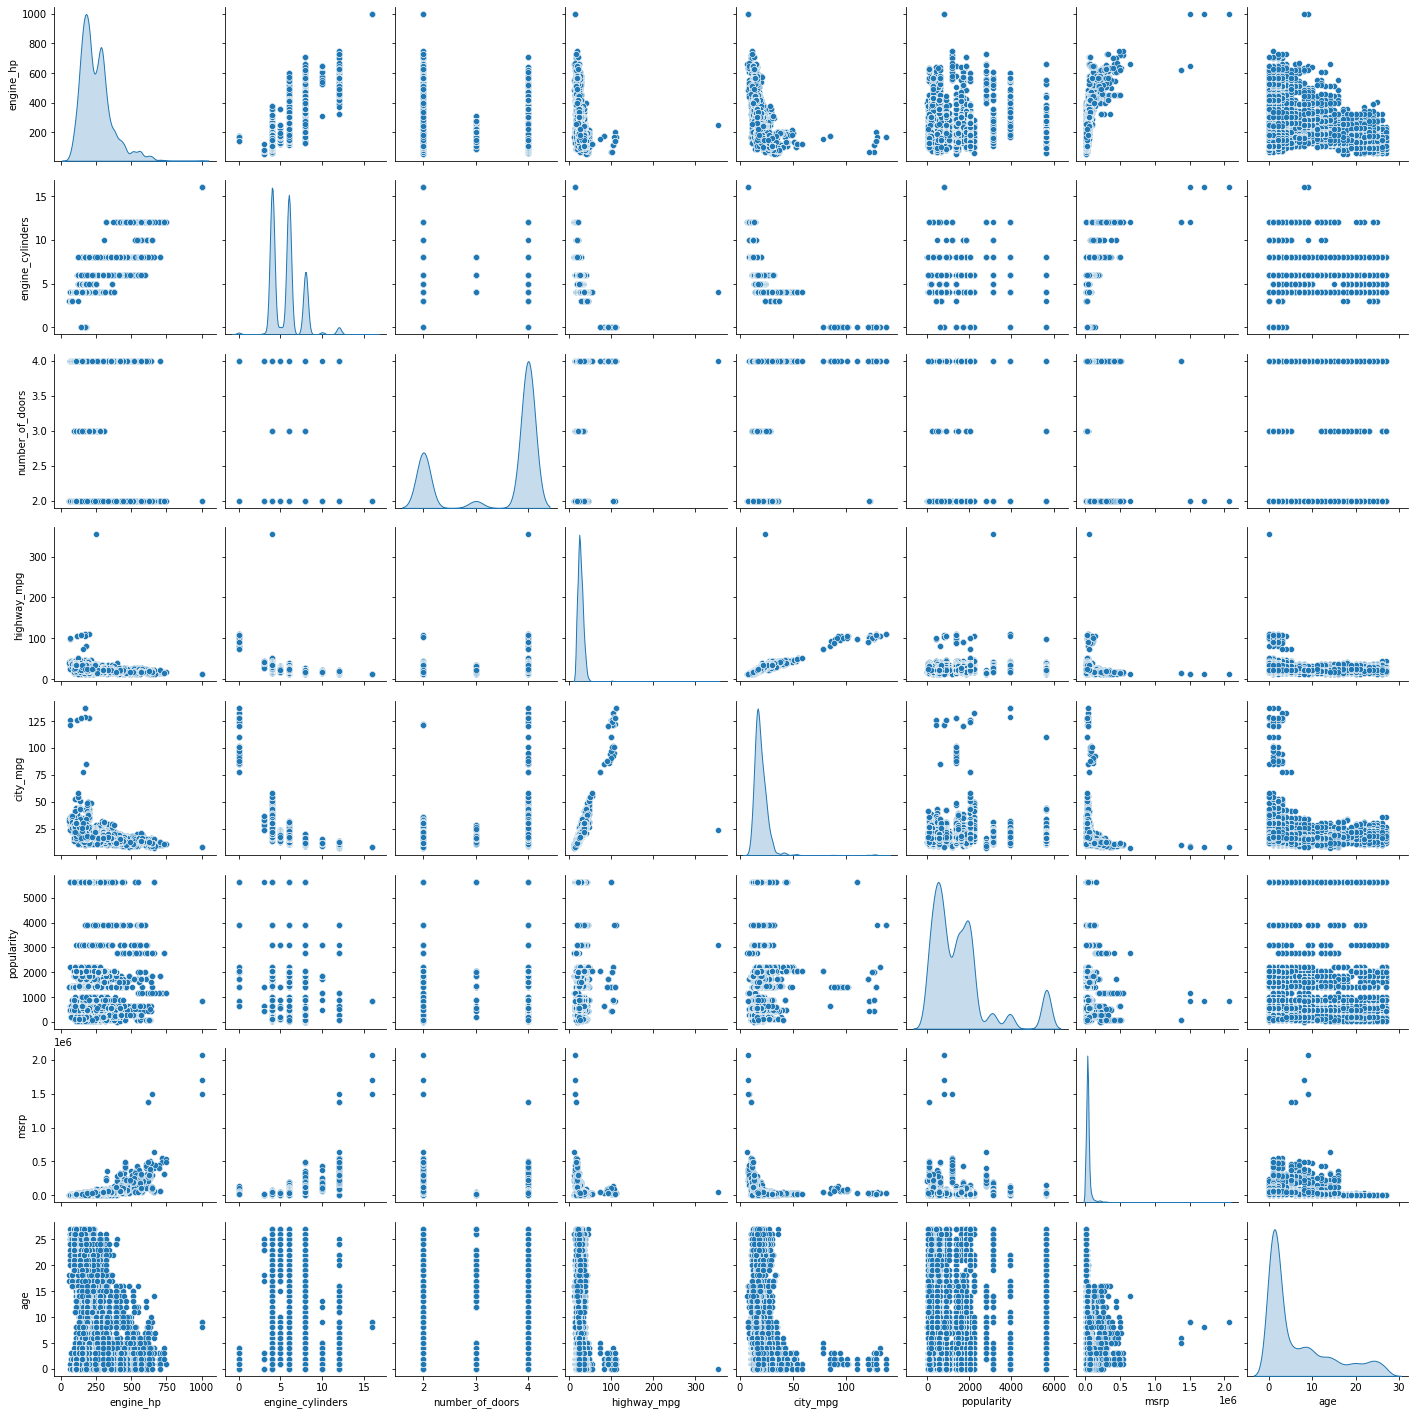

In [16]:
#pairplots to get an intuition of potential correlations
sns.pairplot(car_df, diag_kind="kde");

In [17]:
#creating correlation matrix
corr = car_df.corr()

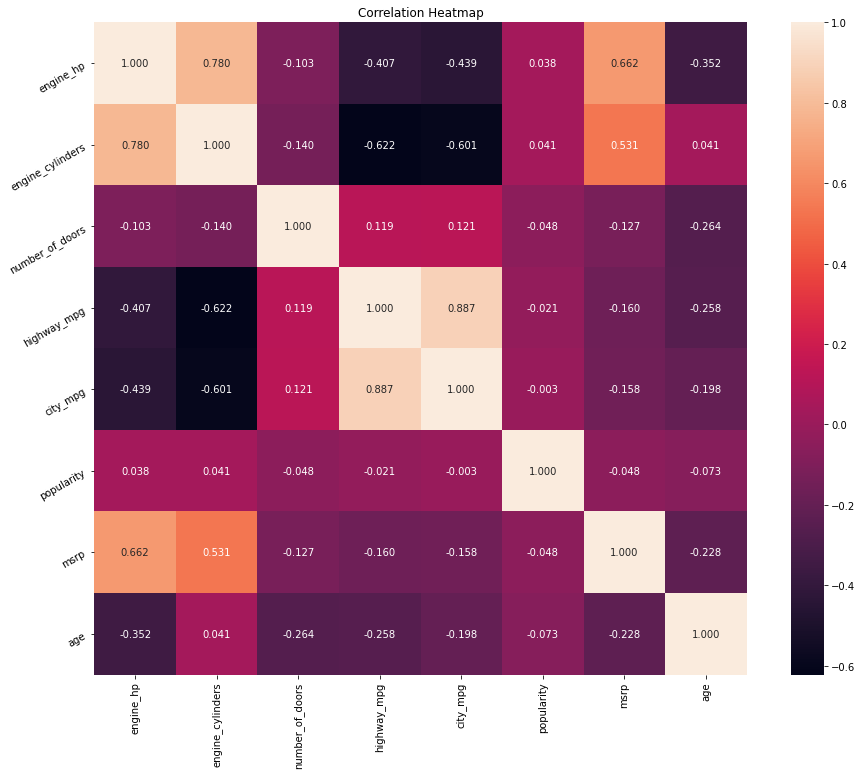

In [18]:
#plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot=True, square=True, fmt='.3f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
corr_matrix = car_df.corr()
corr_matrix['msrp'].sort_values(ascending=False)

msrp                1.000000
engine_hp           0.662008
engine_cylinders    0.531312
popularity         -0.048476
number_of_doors    -0.126635
city_mpg           -0.157676
highway_mpg        -0.160043
age                -0.227590
Name: msrp, dtype: float64

## Segregating the categorical and numerical features from dataframe

In [20]:
#segregating the categorical from the dataframe
cat_vars = ['object']
cat_df = car_df.select_dtypes(include=cat_vars)
cat_df.head()

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,bmw,1_series_m,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible


In [21]:
#printing missing value and labels in each column
print(cat_df.isnull().sum())
print('-'*25)
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

make                    0
model                   0
engine_fuel_type        3
transmission_type       0
driven_wheels           0
market_category      3742
vehicle_size            0
vehicle_style           0
dtype: int64
-------------------------
make has 48 labels
model has 914 labels
engine_fuel_type has 11 labels
transmission_type has 5 labels
driven_wheels has 4 labels
market_category has 72 labels
vehicle_size has 3 labels
vehicle_style has 16 labels


In [22]:
#segregating the numerical columns from the dataframe
numerics = ['int64', 'float64']
num_df = car_df.select_dtypes(include=numerics)
num_df.head()

,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,age
0,335.0,6.0,2.0,26,19,3916,46135,6
1,300.0,6.0,2.0,28,19,3916,40650,6
2,300.0,6.0,2.0,28,20,3916,36350,6
3,230.0,6.0,2.0,28,18,3916,29450,6
4,230.0,6.0,2.0,28,18,3916,34500,6


In [23]:
#counting the missing values in numerical features
num_df.isnull().sum()

engine_hp           69
engine_cylinders    30
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
age                  0
dtype: int64

### Outlier Analysis

In [24]:
#summary statistics of all the columns
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_hp,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
engine_cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
number_of_doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
msrp,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0
age,11914.0,6.615662,7.579740,0.0,1.0,2.0,10.00,27.0


- `If we compare the mean of each column with the min/max value, we'll notice that engine_hp, highway_mpg, city_mpg and popularity might have outliers as there's a considerable difference between average value and max value`.

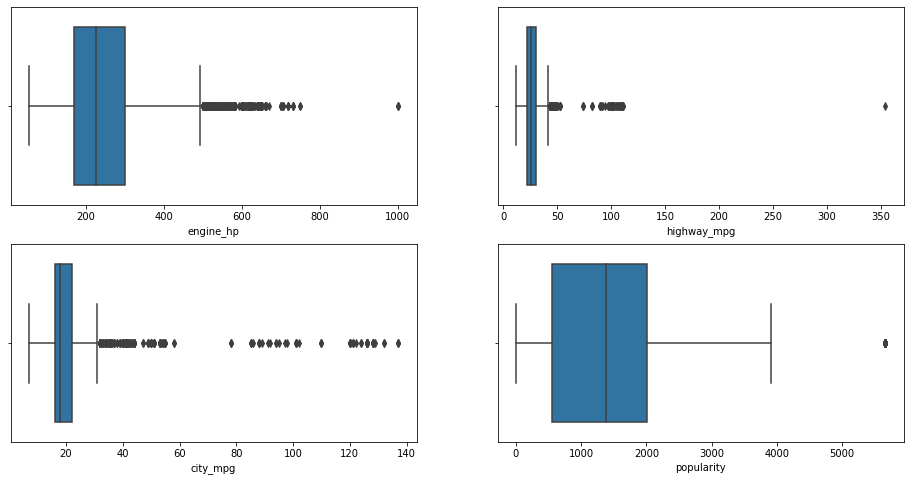

In [25]:
#Checking for outliers
plt.figure(figsize=(16,8)) #(width,height)
plt.subplot(2,2,1) #(row, column, plot_number)
#The figure has 1 row, 1 columns, and this plot is the first plot. 
sns.boxplot(x='engine_hp', data=num_df);
plt.subplot(2,2,2)
#The figure has 1 row, 2 columns, and this plot is the second plot.
sns.boxplot(x='highway_mpg', data=num_df);
plt.subplot(2,2,3)
#The figure has 2 row, 1 columns, and this plot is the second plot.
sns.boxplot(x='city_mpg', data=num_df);
plt.subplot(2,2,4)
#The figure has 2 row, 2 columns, and this plot is the second plot.
sns.boxplot(x='popularity', data=num_df);

# 4. Feature Engineering and Scaling

In [26]:
# segregating the target variable
X = car_df.drop(['msrp'], axis=1)
y = car_df['msrp'].copy()

In [27]:
print(f"Columns names of X:")
for i in range(len(X.columns)):
    print(' ~>', X.columns[i])    

Columns names of X:
 ~> make
 ~> model
 ~> engine_fuel_type
 ~> engine_hp
 ~> engine_cylinders
 ~> transmission_type
 ~> driven_wheels
 ~> number_of_doors
 ~> market_category
 ~> vehicle_size
 ~> vehicle_style
 ~> highway_mpg
 ~> city_mpg
 ~> popularity
 ~> age


In [28]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (11914, 15)
Shape of y: (11914,)


In [29]:
#creating training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print('-'*25)
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (9531, 15)
Shape of y_train: (9531,)
-------------------------
Shape of X_test: (2383, 15)
Shape of y_test: (2383,)


## Imputing Missing Values

In [31]:
#creating a list numerical and categorical columns
num_cols = list(X_train.select_dtypes(include=numerics).columns)
cat_cols = list(X_train.select_dtypes(include=cat_vars).columns)

- `Since there are a lot of outliers in the data, we're going to use median strategy to impute rather than mean because median is not sensitive to outliers`

In [32]:
#imputing missing numerical values in both training and testing data
for df in [X_train, X_test]:
    for col in num_cols:
        col_median=X_train[col].median() # usign median to impute
        df[col].fillna(col_median, inplace=True)

- `Using the mode of each categorical column to impute the values`

In [33]:
#imputing missing categorical values in both training and testing data
for df in [X_train, X_test]:
    for col in cat_cols:
        col_mode=X_train[col].mode()[0] # usign mode to impute
        df[col].fillna(col_mode, inplace=True)

In [34]:
#checking missing values in X_train
X_train.isnull().sum()

make                 0
model                0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
age                  0
dtype: int64

In [35]:
#checking missing values in X_test
X_test.isnull().sum()

make                 0
model                0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
age                  0
dtype: int64

## Removing Outliers

- Removing outliers from engine_hp, highway_mpg, city_mpg and popularity columns.
- ref:
  - [Feature Engineering – How to Detect and Remove Outliers (with Python Code)](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)
  - [Detecting and Treating Outliers | Treating the odd one out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

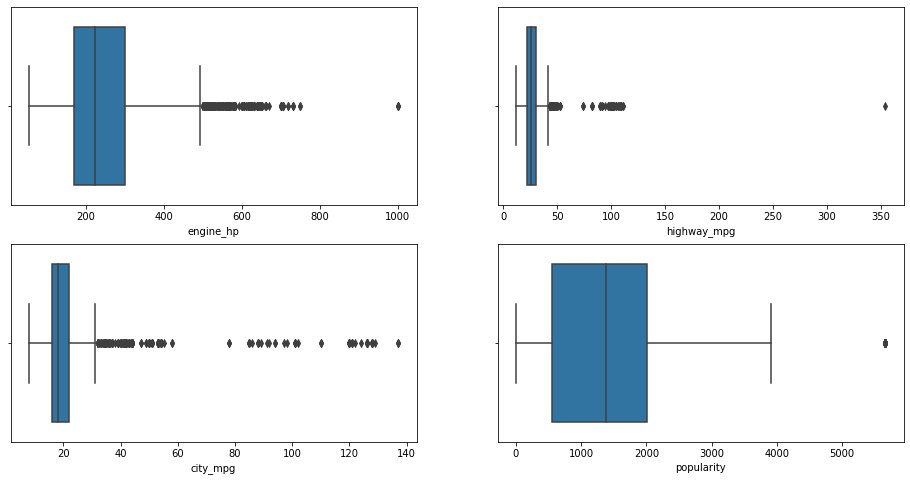

In [36]:
#before removing Outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x='engine_hp', data=X_train);
plt.subplot(2,2,2)
sns.boxplot(x='highway_mpg', data=X_train);
plt.subplot(2,2,3)
sns.boxplot(x='city_mpg', data=X_train);
plt.subplot(2,2,4)
sns.boxplot(x='popularity', data=X_train);

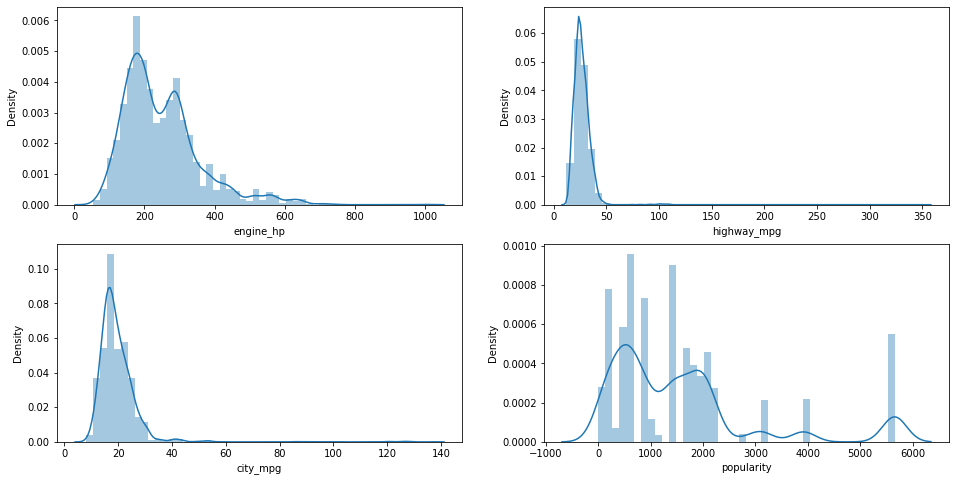

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(X_train['engine_hp'])
plt.subplot(2,2,2)
sns.distplot(X_train['highway_mpg'])
plt.subplot(2,2,3)
sns.distplot(X_train['city_mpg'])
plt.subplot(2,2,4)
sns.distplot(X_train['popularity']);
#from this we got to know that we have to use IQR based filtering because our data distribution is skewed

In [38]:
def cap_min_max_values(df, var, min_value, max_value):
    """
    We cap our outliers data and make the limit, i.e, above a particular value or less than that value, 
    all the values will be considered as outliers.
    """
    return np.where(df[var]>max_value, max_value, np.where(df[var]<min_value, min_value, df[var]))

for df in [X_train, X_test]:
    for index in ['engine_hp', 'highway_mpg', 'city_mpg']:
        upper_limit = df[index].mean() + 3*df[index].std()
        lower_limit = df[index].mean() - 3*df[index].std()
        df[index] = cap_min_max_values(df, index, lower_limit, upper_limit)

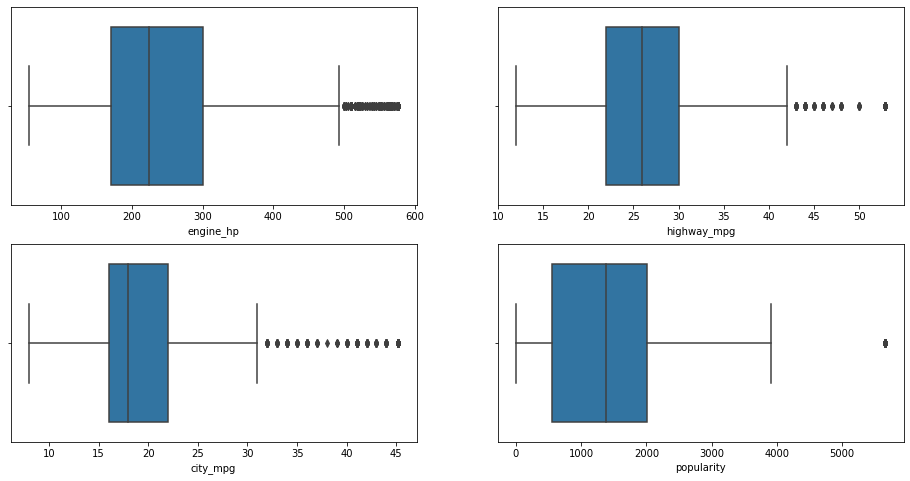

In [39]:
#after removing outliers
plt.figure(figsize=(16,8)) 
plt.subplot(2,2,1)  
sns.boxplot(x='engine_hp', data=X_train);
plt.subplot(2,2,2)
sns.boxplot(x='highway_mpg', data=X_train);
plt.subplot(2,2,3)
sns.boxplot(x='city_mpg', data=X_train);
plt.subplot(2,2,4)
sns.boxplot(x='popularity', data=X_train);

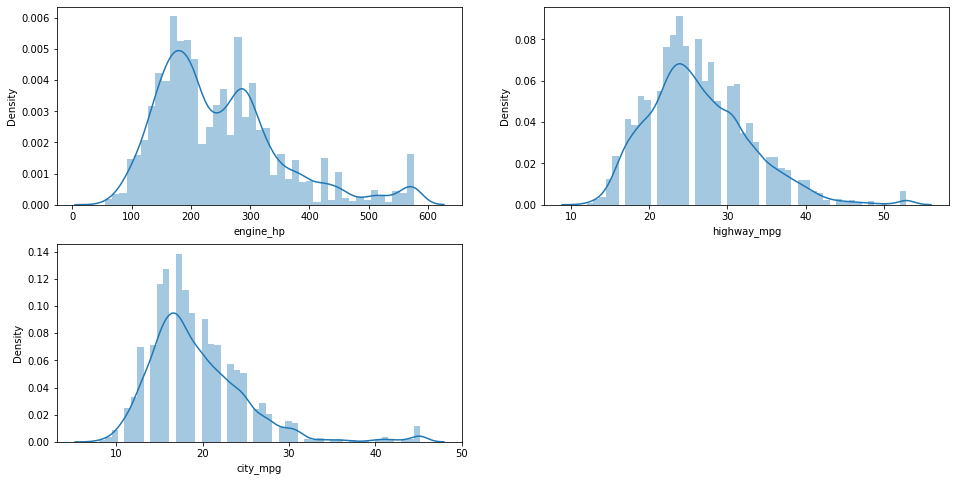

In [40]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(X_train['engine_hp'])
plt.subplot(2,2,2)
sns.distplot(X_train['highway_mpg'])
plt.subplot(2,2,3)
sns.distplot(X_train['city_mpg']);
#much better now

## One-Hot Encoding the Categorical columns

In [41]:
#converting dataframes into dictionaries
train_dict = X_train[cat_cols + num_cols].to_dict(orient='rows')
test_dict = X_test[cat_cols + num_cols].to_dict(orient='rows')

In [42]:
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)

DictVectorizer(sparse=False)

In [43]:
X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

In [44]:
X_train[0]

array([1.000e+00, 2.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.650e+02, 3.100e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [45]:
#feature names of the encoded variables
print(len(dv.get_feature_names()))
cols = dv.get_feature_names()
print(cols)

860
['age', 'city_mpg', 'driven_wheels=all_wheel_drive', 'driven_wheels=four_wheel_drive', 'driven_wheels=front_wheel_drive', 'driven_wheels=rear_wheel_drive', 'engine_cylinders', 'engine_fuel_type=diesel', 'engine_fuel_type=electric', 'engine_fuel_type=flex-fuel_(premium_unleaded_recommended/e85)', 'engine_fuel_type=flex-fuel_(premium_unleaded_required/e85)', 'engine_fuel_type=flex-fuel_(unleaded/e85)', 'engine_fuel_type=flex-fuel_(unleaded/natural_gas)', 'engine_fuel_type=premium_unleaded_(recommended)', 'engine_fuel_type=premium_unleaded_(required)', 'engine_fuel_type=regular_unleaded', 'engine_hp', 'highway_mpg', 'make=acura', 'make=aston_martin', 'make=audi', 'make=bentley', 'make=bmw', 'make=buick', 'make=cadillac', 'make=chevrolet', 'make=chrysler', 'make=dodge', 'make=ferrari', 'make=fiat', 'make=ford', 'make=gmc', 'make=honda', 'make=hummer', 'make=hyundai', 'make=infiniti', 'make=kia', 'make=lamborghini', 'make=land_rover', 'make=lexus', 'make=lincoln', 'make=lotus', 'make=ma

- `After one hot encoding we have 860 columns in our training and testing set.`

## Feature Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [48]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9531.0,0.243914,0.279392,0.0,0.037037,0.074074,0.370370,1.0
city_mpg,9531.0,0.305358,0.153830,0.0,0.215199,0.268998,0.376598,1.0
driven_wheels=all_wheel_drive,9531.0,0.198510,0.398899,0.0,0.000000,0.000000,0.000000,1.0
driven_wheels=four_wheel_drive,9531.0,0.114364,0.318269,0.0,0.000000,0.000000,0.000000,1.0
driven_wheels=front_wheel_drive,9531.0,0.404470,0.490815,0.0,0.000000,0.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...
vehicle_style=passenger_minivan,9531.0,0.035568,0.185221,0.0,0.000000,0.000000,0.000000,1.0
vehicle_style=passenger_van,9531.0,0.010072,0.099860,0.0,0.000000,0.000000,0.000000,1.0
vehicle_style=regular_cab_pickup,9531.0,0.031266,0.174046,0.0,0.000000,0.000000,0.000000,1.0
vehicle_style=sedan,9531.0,0.260728,0.439055,0.0,0.000000,0.000000,1.000000,1.0


# 5. Selecting and Training Models

1. `Linear Regression`
2. `Decision Tree`
3. `Random Forest`
4. `SVM regressor`

In [49]:
print(f"In X_train dataset there are: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"In X_test dataset there are: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

In X_train dataset there are: 9531 rows and 860 columns.
In X_test dataset there are: 2383 rows and 860 columns.
The shape of y_train is: (9531,)
The shape of y_test is: (2383,)


### Mean Squared Error

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
price_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, price_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

13685.018980666653

In [57]:
lin_reg_cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_cv_scores)
lin_reg_rmse_scores.mean()

34798842104138.824

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
price_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, price_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

5048.066697973427

In [59]:
tree_reg_cv_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
tree_reg_rmse_scores = np.sqrt(-tree_reg_cv_scores)
tree_reg_rmse_scores.mean()

20234.70648146341

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         X_train,
                                         y_train,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

16417.25107830337

In [61]:

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
# feature importances 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.75781565e-02, 7.79675405e-02, 9.83091774e-03, 7.15245639e-04,
       8.01153804e-03, 1.22755035e-02, 1.43326348e-01, 1.13286178e-03,
       4.56587426e-04, 8.33952195e-05, 4.20565536e-04, 8.09976103e-04,
       4.47480078e-07, 5.37073935e-03, 6.16580566e-03, 5.48318507e-02,
       8.20747092e-02, 7.45884344e-02, 1.85915807e-04, 5.80710311e-03,
       1.28347145e-03, 8.35617800e-03, 1.29504175e-03, 1.91282018e-04,
       1.51417822e-03, 1.43735799e-03, 3.30465798e-04, 8.86122674e-04,
       8.30248231e-03, 2.18922773e-04, 9.94178482e-04, 1.23373605e-03,
       5.56158240e-04, 1.97400090e-05, 3.19021726e-04, 9.58605634e-04,
       1.28362254e-04, 5.81633751e-03, 1.15501957e-03, 6.11059145e-04,
       6.08140494e-04, 6.87903848e-04, 1.60216156e-03, 3.66818138e-02,
       4.89170296e-04, 6.36360119e-04, 2.53632466e-03, 2.33355920e-04,
       4.66267571e-04, 4.49738765e-04, 2.26748905e-04, 4.52316140e-04,
       1.89622180e-03, 5.95891478e-03, 2.47591382e-04, 3.96291410e-05,
      

In [63]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [64]:
final_rmse

7182.542756681732